# MOVIES ANALYSIS


### Description

We are downloading a CVS about movies in digital platforms like Netflix, Disney+, Prime and others.


In [262]:
import os
import io


# Import from third party libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws

ws.filterwarnings('ignore')

import requests

### Configure pandas

In [59]:
# No muestre columnas maximas 
pd.set_option('display.max_columns', None)

### Download dataset from online resource

In [60]:
URL_ONLINE_DATASET = 'https://raw.githubusercontent.com/galileoguzman/data-bedu-movies/main/data/MoviesOnStreamingPlatforms_updated.csv'
response = requests.get(URL_ONLINE_DATASET)
print(response.status_code)

response.raise_for_status()

container_folder =  'data/'
filename = container_folder + 'movies.csv'

print(os.path.exists(container_folder))

if not (os.path.exists(container_folder)):
    print('--------------------------------')
    print('MSG: Dataset container folder does not exists')
    os.makedirs(container_folder)
    print(f'MSG: Dataset container folder is created with name: {container_folder}')
    print('--------------------------------')

with open(filename, 'wb') as csv_file:
    csv_file.write(response.content)
print('File downloaded!!! :D')

200
True
File downloaded!!! :D


In [61]:
%ls data

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: 4C94-1FB3

 Directorio de C:\fabiola\bedu\Curso3-Procesamiento de datos con Python\proyectos\BEDU-DATA-04-20210306\data

06/03/2021  11:15 a. m.    <DIR>          .
06/03/2021  11:15 a. m.    <DIR>          ..
06/03/2021  01:34 p. m.         1,926,226 movies.csv
               1 archivos      1,926,226 bytes
               2 dirs  1,269,908,520,960 bytes libres


### Reading dataset from folder/file

In [62]:
df = pd.read_csv?

In [ ]:
df = pd.read_csv

In [63]:
df = pd.read_csv

In [64]:
df = pd.read_csv

### Showing first five elements from dataset using pandas

In [65]:
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


### Taking off unnecesary column from dataset

In [66]:
# borrar columnas que no nos van a servir
df.drop('Unnamed: 0', axis=1, inplace=True)

# axis = axioma de que existe uno
# inplace = estoy seguro de que sí existe

In [67]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


### Normalize column names

In [68]:
# Definition onf new function
def clean_column_names(column_name):
    '''
    Function in charge of clean the column names in and standar camel case format
    '''
    return column_name.lower().strip().replace(' ', '_')


df = df.rename(columns=clean_column_names)


In [69]:
df.head()

,id,title,year,age,imdb,rotten_tomatoes,netflix,hulu,prime_video,disney+,type,directors,genres,country,language,runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


### Get top 10 based on IMDB RANKING

In [70]:
top_10_imdb = df.sort_values(by='imdb', ascending=False)[['title', 'imdb']][:20]
print(top_10_imdb)


                                                   title  imdb
1292   My Next Guest with David Letterman and Shah Ru...   9.3
7220                                  Down, But Not Out!   9.3
6566                                          Square One   9.3
5110                                     Love on a Leash   9.3
6837             Steven Banks: Home Entertainment Center   9.3
7426                                              Bounty   9.3
8458                                      Where's Daddy?   9.1
947                                            Natsamrat   9.1
7491                                      Finding Family   9.1
7267                                   A Dog Named Gucci   9.0
7002                           Escape from Firebase Kate   9.0
3560                                     The Dark Knight   9.0
10249                 8 Wheels & Some Soul Brotha' Music   8.9
8220                                          Lost Kites   8.9
8359                               Stronger Than Bullet

### Create a bar plot using pls and sns

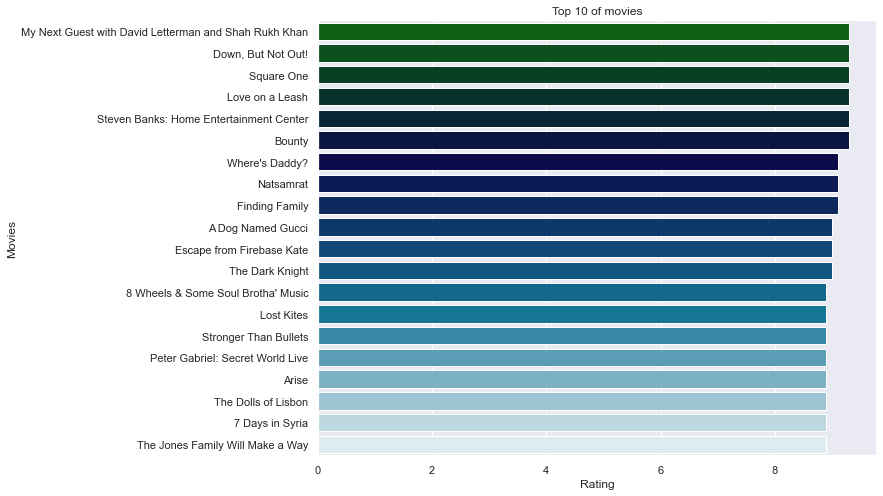

In [71]:
# Inserta la interfaz inicial
# que configurara el tema por default sns.set
# crear aa matplot que creara una figura con titulo top 10 of movies
# que las ejes x pusiera Rating
# a las y movies
# Configure sns
sns.set()

#sns es la que está graficando.


# Create plt
# puntos encontrados en eje x y eje y
# son puntos son calculado a 16 pixeles
# como se calculaba antes
# al mat sobre esa figura quiero que imprimas algo
# uno que agregue un titulo
# que agregue una grafica de barras
# al eje x y y le ponga movies y rating
plt.figure(figsize=(10, 8))
plt.title('Top 10 of movies')

# se encarga de poner las barras de colores
# se está inyectando sns.barplot a plt
sns.barplot(data=top_10_imdb, y='title', x='imdb', palette='ocean')
# en medio de la configuracion de x y y

# se pone las etiquetas en el eje 
plt.xlabel('Rating')
plt.ylabel('Movies')

# la grafica de barra está inyectadas dentro de plt



# showing plot
plt.show()

### Movies produced by year

In [86]:
# movies_count_by_year = df.year.value_counts()[:20].reset_index().rename(columns={'index':'year', {'year' : 'count'})

print('1 --------------------------------')
# Count values by column 'year'
movies_count_by_year = df.year.value_counts()

# Getting first 20 items from previous serie/list
movies_count_by_year = movies_count_by_year[:20]
print(movies_count_by_year)

print('\n2 --------------------------------')
# Resetting index
# vvelva a tratar los datos "movies_count_by_year" como una columnas
# y vuelva a resetear el indice
movies_count_by_year = movies_count_by_year.reset_index()
print(movies_count_by_year)



print('\n3 --------------------------------')
# Set name for columns
movies_count_by_year = movies_count_by_year.rename(columns={'index':'year', 'year':'count'})

# el index sea la columna year
# quiero que el year se convierta en el count

# showing result
print(movies_count_by_year)

# print(type(movies_count_by_year))

1 --------------------------------
2017    1401
2018    1285
2016    1206
2015    1065
2014     986
2013     964
2012     843
2019     689
2011     645
2009     548
2010     533
2008     442
2007     375
2006     338
2005     285
2004     217
2003     214
2002     193
2000     172
2001     156
Name: year, dtype: int64

2 --------------------------------
    index  year
0    2017  1401
1    2018  1285
2    2016  1206
3    2015  1065
4    2014   986
5    2013   964
6    2012   843
7    2019   689
8    2011   645
9    2009   548
10   2010   533
11   2008   442
12   2007   375
13   2006   338
14   2005   285
15   2004   217
16   2003   214
17   2002   193
18   2000   172
19   2001   156

3 --------------------------------
    year  count
0   2017   1401
1   2018   1285
2   2016   1206
3   2015   1065
4   2014    986
5   2013    964
6   2012    843
7   2019    689
8   2011    645
9   2009    548
10  2010    533
11  2008    442
12  2007    375
13  2006    338
14  2005    285
15  2004    217


### Show plt about count of movies by year
### https://seaborn.pydata.org/tutorial/color_palettes.html

Text(0, 0.5, 'Count')

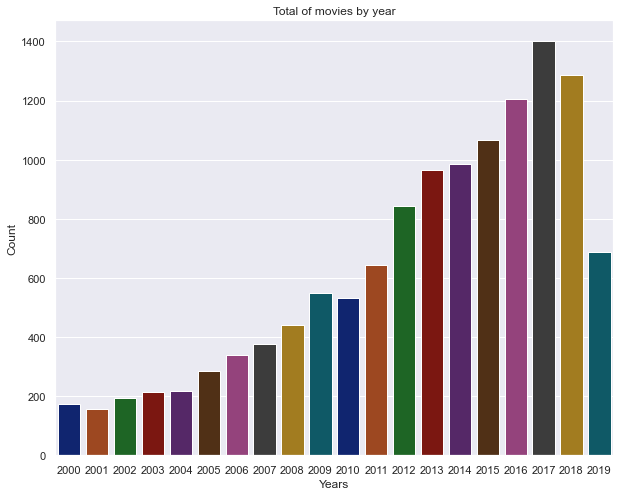

In [92]:
sns.set()

plt.figure(figsize=(10,8))

plt.title('Total of movies by year')

# Inyectar un bar plot (grafica de barras)
sns.barplot(data=movies_count_by_year, x= 'year', y='count', palette='muted')
#sns.barplot(data=movies_count_by_year, x= 'year', y='count', palette='colorblind')
sns.barplot(data=movies_count_by_year, x= 'year', y='count', palette='pastel')
sns.barplot(data=movies_count_by_year, x= 'year', y='count', palette='dark')
# https://seaborn.pydata.org/tutorial/color_palettes.html


plt.xlabel('Years')
plt.ylabel('Count')


# PLANTEAMIENTOS

## 1. CUALES SON LOS 10 IDIOMAS/LENGUAJES DE PELICULAS MAS REPETIDOS 
#### GRAFICADOS EN SEABORN

In [102]:
df.head()

,id,title,year,age,imdb,rotten_tomatoes,netflix,hulu,prime_video,disney+,type,directors,genres,country,language,runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


### Movies produced by LANGUAGE

In [100]:
print('1 --------------------------------')
# Count values by column 'language'
movies_count_by_language = df.language.value_counts()

# Getting first 10 items from previous serie/list
movies_count_by_language = movies_count_by_language[:10]
print(movies_count_by_language)

print('\n2 --------------------------------')
# Resetting index
# vvelva a tratar los datos "movies_count_by_year" como una columnas
# y vuelva a resetear el indice
movies_count_by_language = movies_count_by_language.reset_index()
print(movies_count_by_language)

print('\n3 --------------------------------')
# Set name for columns
movies_count_by_language = movies_count_by_language.rename(columns={'index':'language', 'language':'count'})
print(movies_count_by_language)

1 --------------------------------
English            10955
Hindi                503
English,Spanish      276
Spanish              267
English,French       174
Italian              166
French               163
Japanese             155
Mandarin             151
Tamil                 93
Name: language, dtype: int64

2 --------------------------------
             index  language
0          English     10955
1            Hindi       503
2  English,Spanish       276
3          Spanish       267
4   English,French       174
5          Italian       166
6           French       163
7         Japanese       155
8         Mandarin       151
9            Tamil        93

3 --------------------------------
          language  count
0          English  10955
1            Hindi    503
2  English,Spanish    276
3          Spanish    267
4   English,French    174
5          Italian    166
6           French    163
7         Japanese    155
8         Mandarin    151
9            Tamil     93


### Show plt about count of movies by language

Text(0, 0.5, 'Count')

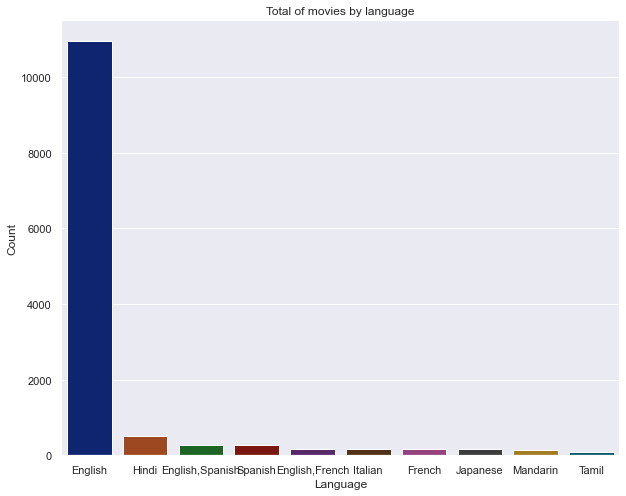

In [101]:
sns.set()

plt.figure(figsize=(10,8))

plt.title('Total of movies by language')

# Inyectar un bar plot (grafica de barras)
sns.barplot(data=movies_count_by_language, x= 'language', y='count', palette='dark')
#sns.barplot(data=movies_count_by_year, x= 'languager', y='count', palette='colorblind')
#sns.barplot(data=movies_count_by_language, x= 'language', y='count', palette='pastel')
#sns.barplot(data=movies_count_by_language, x= 'language', y='count', palette='dark')
# https://seaborn.pydata.org/tutorial/color_palettes.html


plt.xlabel('Language')
plt.ylabel('Count')


## 2. ¿CUAL ES EL COMPORTAMIENTO DE EDAD POR CADA AÑO?
### Con gráfica lineal

In [104]:
df.head()

,id,title,year,age,imdb,rotten_tomatoes,netflix,hulu,prime_video,disney+,type,directors,genres,country,language,runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [179]:
# pd.unique()
# ages_count_by_year = list(pd.Series([df.age, df.year]))


# ages_count_by_year = pd.DataFrame({'year':df.year, 'age':df.age})
# Dejar las variables con las que se trabajarán
# ages_count_by_year = pd.DataFrame(df, columns=['year', 'age'])
ages_by_year_df = df[['year', 'age']]
print(ages_by_year_df)
# [16744 rows x 2 columns]
#   9390 rows × 2 columns     # VALORES NULOS
# [ 7354 rows x 2 columns]    # VALORES NO NULOS

# ages_by_year_df[ages_by_year_df.year == 1980]              # WHERE by YEAR == 1980
# ages_by_year_df[pd.isnull(ages_by_year_df).any(axis=1)]    # WHERE FILTRAR POR VALORES NULOS
# 9390 rows × 2 columns


######
# print('\nVALORES UNICOS')
# print(ages_by_year_df.year.unique())

# pd.isnull(ages_by_year_df)
# Delete data with null
ages_by_year_df = ages_by_year_df.dropna()
# [7354 rows x 2 columns]
print(ages_by_year_df)

       year  age
0      2010  13+
1      1999  18+
2      2018  13+
3      1985   7+
4      1966  18+
...     ...  ...
16739  1980  NaN
16740  2001   7+
16741  2013  NaN
16742  2017  NaN
16743  1950  NaN

[16744 rows x 2 columns]
       year  age
0      2010  13+
1      1999  18+
2      2018  13+
3      1985   7+
4      1966  18+
...     ...  ...
16726  1998  all
16727  1998  all
16737  1974  all
16738  2000  all
16740  2001   7+

[7354 rows x 2 columns]


In [181]:
# 2017  18+    270
# BUSQUEDA POR FILTRO
ages_by_year_df[(ages_by_year_df.year == 2017) & (ages_by_year_df.age == '18+')]   

,year,age
66,2017,18+
86,2017,18+
96,2017,18+
100,2017,18+
105,2017,18+
...,...,...
14387,2017,18+
14792,2017,18+
15103,2017,18+
15383,2017,18+


In [183]:
ages_by_year_df.value_counts?

In [204]:
# ages_count_by_year
# ages_by_year_df.value_counts(sort=True, ascending=True)

# ages_count_by_year = ages_by_year_df.value_counts()
ages_count_by_year = pd.DataFrame(ages_by_year_df.value_counts().reset_index())
ages_count_by_year.columns = ['year', 'age', 'count']
# print(ages_count_by_year)

ages_count_by_year = ages_count_by_year
print(ages_count_by_year)
print(f'\n{type(ages_by_year_df)}')

print(f'\n{type(ages_count_by_year)}')
# movies_count_by_language = movies_count_by_language.reset_index()
# print(movies_count_by_language)
# ages_count_by_year.rename_axis('count')
print('----------------------------------')
# sort by multiple columns: year and age


     year  age  count
0    2017  18+    270
1    2018  18+    255
2    2015  18+    190
3    2016  18+    184
4    2019  18+    170
..    ...  ...    ...
320  1959  13+      1
321  1956   7+      1
322  1954  all      1
323  1952  all      1
324  1902  all      1

[325 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
----------------------------------


In [214]:
print(ages_count_by_year)
# ages_count_by_year.sort_values?
ages_count_by_year.sort_values(by=['year','age', 'count'], ascending=True, inplace=True)
print('-----------------------------------------')
print(ages_count_by_year)

# ages_count_by_year = 
# print(ages_count_by_year)
# Getting first 20 items from previous serie/list
# ages_count_by_year = ages_count_by_year 



     year  age  count
324  1902  all      1
299  1912   7+      1
291  1915   7+      1
290  1919  13+      1
289  1920   7+      1
..    ...  ...    ...
176  2020  13+      7
216  2020  16+      3
87   2020  18+     23
157  2020   7+      9
237  2020  all      2

[325 rows x 3 columns]
-----------------------------------------
     year  age  count
324  1902  all      1
299  1912   7+      1
291  1915   7+      1
290  1919  13+      1
289  1920   7+      1
..    ...  ...    ...
176  2020  13+      7
216  2020  16+      3
87   2020  18+     23
157  2020   7+      9
237  2020  all      2

[325 rows x 3 columns]


In [215]:
#sns.lineplot(data=may_flights, x="year", y="passengers")
ages_by_year_wide = ages_count_by_year.pivot("year", "age", "count")
ages_by_year_wide.head(100)

age,13+,16+,18+,7+,all
year,,,,,
1902,NaN,NaN,NaN,NaN,1.0
1912,NaN,NaN,NaN,1.0,NaN
1915,NaN,NaN,NaN,1.0,NaN
1919,1.0,NaN,NaN,NaN,NaN
1920,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...
2016,92.0,32.0,184.0,95.0,37.0
2017,91.0,63.0,270.0,98.0,40.0
2018,92.0,42.0,255.0,87.0,23.0


<AxesSubplot:xlabel='year'>

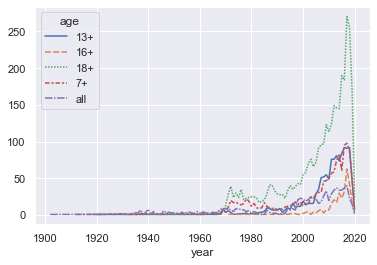

In [209]:
sns.lineplot(data=ages_by_year_wide)

<AxesSubplot:xlabel='year', ylabel='age'>

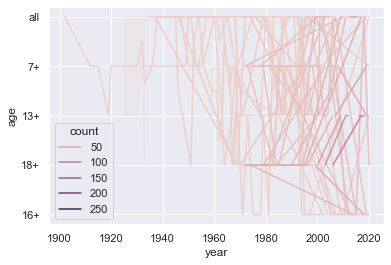

In [212]:
sns.lineplot(data=ages_by_year_wide, x="year", y="age", hue="count")


## 3. CUALES SON LAS PELICULAS MAS POPULARES POR PROVEEDOR 
### PROVEEDOR: netflix, hulu, prime_video, disney+
### Gráfica 

In [216]:
df.head()

,id,title,year,age,imdb,rotten_tomatoes,netflix,hulu,prime_video,disney+,type,directors,genres,country,language,runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


### Identificando valores unicos del campo "imdb"

In [247]:
df.imdb.unique()

array([8.8, 8.7, 8.5, 8.4, 8.3, 8.2, 8.1, 8. , 7.7, 7.9, 7.8, 7.5, 7.6,
       7.4, 7.1, 7.2, 7.3, 7. , 6.8, 6.9, 6.6, 6.7, 6.5, 6.1, 6.4, 6.3,
       6.2, 5.6, 5.9, 5.8, 6. , 5.7, 5.4, 5. , 5.2, 5.3, 5.5, 5.1, 8.6,
       9.1, 4.7, 4.6, 4.8, 4.9, 4.4, 4.5, 9.3, 3.9, 4.1, 3.5, 4.3, 3.6,
       4.2, 3.8, nan, 4. , 3.4, 3.7, 2.6, 3.1, 3.2, 2.9, 2.5, 2.8, 3.3,
       1.6, 2.1, 2.2, 3. , 2.7, 2.3, 2.4, 1.7, 1.4, 9. , 0. , 8.9, 2. ,
       1.8, 1.9, 1. , 1.5, 1.3])

### Identificando valores únicos de los campos netflix y hulu

In [248]:
df.netflix.unique()

df.hulu.unique()

array([0, 1], dtype=int64)

### Realizando pruebas de filtrado con el dataframe

In [254]:
df[(df.imdb > 8.5)]

,id,title,year,age,imdb,rotten_tomatoes,netflix,hulu,prime_video,disney+,type,directors,genres,country,language,runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
845,846,Gol Maal,1979,18+,8.6,NaN,1,0,1,0,0,Hrishikesh Mukherjee,"Comedy,Romance",India,Hindi,120.0
947,948,Natsamrat,2016,NaN,9.1,NaN,1,0,0,0,0,Mahesh Manjrekar,"Drama,Family",India,Marathi,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11873,11874,Ruby's Studio: the Feelings Show,2010,NaN,8.8,NaN,0,0,1,0,0,"Jason Docter,Matt Docter",Family,United States,English,46.0
11910,11911,Second Chance By Betrayal,2018,NaN,8.7,NaN,0,0,1,0,0,Terrence Weasel Smith,Drama,United States,English,NaN
15175,15176,Shred: The Story of Asher Bradshaw,2013,NaN,8.8,NaN,0,0,1,0,0,Kathy Herndl,"Documentary,Biography,Family,Sport",United States,English,136.0
16212,16213,Star Wars: A New Hope,1977,7+,8.6,92%,0,0,0,1,0,George Lucas,"Action,Adventure,Fantasy,Sci-Fi",United States,English,121.0


### Se realiza un filtrado sobre el criterio imdb.
### El valor que se utiliza para obtener a las películas más populares es MAYOR o IGUAL a 8.5

In [255]:
popular_movies_df = df[(df.imdb > 8.5)]
len(popular_movies_df)


97

### Creamos un nuevo dataframe a partir de "popular_movies_df"

In [281]:

popular_movies = popular_movies_df[['id', 'title','year', 'imdb', 'rotten_tomatoes', 'netflix', 'hulu', 'prime_video', 'disney+', 'type', 'directors','genres']]
# print(popular_movies)
popular_movies.head(30)


,id,title,year,imdb,rotten_tomatoes,netflix,hulu,prime_video,disney+,type,directors,genres
0,1,Inception,2010,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller"
1,2,The Matrix,1999,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi"
4,5,"The Good, the Bad and the Ugly",1966,8.8,97%,1,0,1,0,0,Sergio Leone,Western
845,846,Gol Maal,1979,8.6,NaN,1,0,1,0,0,Hrishikesh Mukherjee,"Comedy,Romance"
947,948,Natsamrat,2016,9.1,NaN,1,0,0,0,0,Mahesh Manjrekar,"Drama,Family"
1214,1215,Bill Hicks: Relentless,1992,8.7,NaN,1,0,0,0,0,Chris Bould,"Documentary,Comedy"
1292,1293,My Next Guest with David Letterman and Shah Ru...,2019,9.3,NaN,1,0,0,0,0,NaN,Talk-Show
1311,1312,Eh Janam Tumhare Lekhe,2015,8.7,NaN,1,0,0,0,0,Harjit Singh,Biography
1312,1313,Bill Hicks: Revelations,1993,8.6,NaN,1,0,1,0,0,Chris Bould,"Documentary,Comedy"
1356,1357,Merku Thodarchi Malai,2018,8.6,NaN,1,0,0,0,0,Leninbharati,Drama


### Ordenamos por imdb

In [282]:
popular_movies.sort_values(by=['imdb'], ascending=False, inplace=True)
# print(popular_movies)
popular_movies.head(60)

,id,title,year,imdb,rotten_tomatoes,netflix,hulu,prime_video,disney+,type,directors,genres
6566,6567,Square One,2019,9.3,NaN,0,0,1,0,0,Danny Wu,"Documentary,Drama,Music"
6837,6838,Steven Banks: Home Entertainment Center,1989,9.3,NaN,0,0,1,0,0,Tom McLoughlin,Comedy
7220,7221,"Down, But Not Out!",2015,9.3,NaN,0,0,1,0,0,Miguel Gaudêncio,"Documentary,Sport"
1292,1293,My Next Guest with David Letterman and Shah Ru...,2019,9.3,NaN,1,0,0,0,0,NaN,Talk-Show
7426,7427,Bounty,2011,9.3,NaN,0,0,1,0,0,Roger Donaldson,"Adventure,Drama,History,Romance"
5110,5111,Love on a Leash,2011,9.3,NaN,0,0,1,0,0,Fen Tian,"Comedy,Drama,Fantasy,Romance"
947,948,Natsamrat,2016,9.1,NaN,1,0,0,0,0,Mahesh Manjrekar,"Drama,Family"
7491,7492,Finding Family,2013,9.1,NaN,0,0,1,0,0,"Chris Leslie,Oggi Tomic","Documentary,Family,History,War"
8458,8459,Where's Daddy?,2017,9.1,NaN,0,0,1,0,0,Rel Dowdell,Documentary
3560,3561,The Dark Knight,2008,9.0,94%,0,1,0,0,0,Christopher Nolan,"Action,Crime,Drama,Thriller"


### A partir de las banderas de los proveedores especificados de un dataframe, se identifica crear una funcion 
### que permita retornar el nombre del o los proveedores de la película.
### Se utiliza la funcion apply de dataframe

In [283]:
# lista = ['netflix', 'hulu', 'prime_video', 'disney+', 'type']

#def determina_proveedor(netflix, hulu, prime_video, disney, tipo):
def determina_proveedor(row):
    proveedor = ''
    if row['netflix'] == 1:
        proveedor = 'netflix'
    if row['hulu'] == 1:
        if not proveedor:
            proveedor = 'hulu'
        else:
            proveedor += ',hulu'
    if row['prime_video'] == 1:
        if not proveedor:
            proveedor = 'prime_video'
        else:
            proveedor += ',prime_video'
    if row['disney+'] == 1:
        if not proveedor:
            proveedor = 'disney+'
        else:
            proveedor += ',disney+'
    if row['type'] == 1:
        if not proveedor:
            proveedor = 'type'
        else:
            proveedor += ',type'
    return proveedor

#popular_movies['proveedor'] = popular_movies.apply(lambda x: determina_proveedor(popular_movies['netflix'], popular_movies['hulu'], popular_movies['prime_video'], popular_movies['disney+'], popular_movies['type']), axis=1)

popular_movies['proveedor'] = popular_movies.apply(determina_proveedor, axis=1)
popular_movies.head(20)


,id,title,year,imdb,rotten_tomatoes,netflix,hulu,prime_video,disney+,type,directors,genres,proveedor
6566,6567,Square One,2019,9.3,NaN,0,0,1,0,0,Danny Wu,"Documentary,Drama,Music",prime_video
6837,6838,Steven Banks: Home Entertainment Center,1989,9.3,NaN,0,0,1,0,0,Tom McLoughlin,Comedy,prime_video
7220,7221,"Down, But Not Out!",2015,9.3,NaN,0,0,1,0,0,Miguel Gaudêncio,"Documentary,Sport",prime_video
1292,1293,My Next Guest with David Letterman and Shah Ru...,2019,9.3,NaN,1,0,0,0,0,NaN,Talk-Show,netflix
7426,7427,Bounty,2011,9.3,NaN,0,0,1,0,0,Roger Donaldson,"Adventure,Drama,History,Romance",prime_video
5110,5111,Love on a Leash,2011,9.3,NaN,0,0,1,0,0,Fen Tian,"Comedy,Drama,Fantasy,Romance",prime_video
947,948,Natsamrat,2016,9.1,NaN,1,0,0,0,0,Mahesh Manjrekar,"Drama,Family",netflix
7491,7492,Finding Family,2013,9.1,NaN,0,0,1,0,0,"Chris Leslie,Oggi Tomic","Documentary,Family,History,War",prime_video
8458,8459,Where's Daddy?,2017,9.1,NaN,0,0,1,0,0,Rel Dowdell,Documentary,prime_video
3560,3561,The Dark Knight,2008,9.0,94%,0,1,0,0,0,Christopher Nolan,"Action,Crime,Drama,Thriller",hulu


### Ordenar por proveedor e imdb

In [311]:
# popular_movies.groupby(by=['proveedor'])
popular_movies.sort_values(by=['proveedor','imdb'], ascending=True, inplace=True)
#popular_movies.sort_values(by=['imdb'], ascending=False, inplace=True)
popular_movies.head(60)


,id,title,year,imdb,rotten_tomatoes,netflix,hulu,prime_video,disney+,type,directors,genres,proveedor
16212,16213,Star Wars: A New Hope,1977,8.6,92%,0,0,0,1,0,George Lucas,"Action,Adventure,Fantasy,Sci-Fi",disney+
16213,16214,Star Wars: The Empire Strikes Back,1980,8.7,94%,0,0,0,1,0,Irvin Kershner,"Action,Adventure,Fantasy,Sci-Fi",disney+
3564,3565,The Green Mile,1999,8.6,78%,0,1,0,0,0,Frank Darabont,"Crime,Drama,Fantasy,Mystery",hulu
3561,3562,GoodFellas,1990,8.7,96%,0,1,0,0,0,Martin Scorsese,"Biography,Crime,Drama",hulu
3560,3561,The Dark Knight,2008,9.0,94%,0,1,0,0,0,Christopher Nolan,"Action,Crime,Drama,Thriller",hulu
3562,3563,Parasite,2019,8.6,99%,0,1,1,0,0,Bong Joon Ho,"Comedy,Drama,Thriller","hulu,prime_video"
2704,2705,True: Happy Hearts Day,2019,8.6,NaN,1,0,0,0,0,Harold Harris,"Animation,Short,Adventure,Family,Fantasy",netflix
1538,1539,Luciano Mellera: Infantiloide,2018,8.6,NaN,1,0,0,0,0,"Raúl Campos,Jan Suter",Comedy,netflix
1468,1469,K. D.,2019,8.6,NaN,1,0,0,0,0,"Prasad Gavandi,Suleman Quadri","Crime,Drama,Mystery,Thriller",netflix
1356,1357,Merku Thodarchi Malai,2018,8.6,NaN,1,0,0,0,0,Leninbharati,Drama,netflix


#### Obtener el top ten general por proveedor

In [333]:
top_10_provider_imdb = popular_movies.sort_values(by=['proveedor','imdb'], ascending=False)[['title', 'imdb', 'proveedor']]
print(top_10_provider_imdb)

                                         title  imdb    proveedor
6566                                Square One   9.3  prime_video
5110                           Love on a Leash   9.3  prime_video
7426                                    Bounty   9.3  prime_video
7220                        Down, But Not Out!   9.3  prime_video
6837   Steven Banks: Home Entertainment Center   9.3  prime_video
...                                        ...   ...          ...
3560                           The Dark Knight   9.0         hulu
3561                                GoodFellas   8.7         hulu
3564                            The Green Mile   8.6         hulu
16213       Star Wars: The Empire Strikes Back   8.7      disney+
16212                    Star Wars: A New Hope   8.6      disney+

[97 rows x 3 columns]


#### Identificar los proveedores

In [323]:
popular_movies.proveedor.unique()

array(['disney+', 'hulu', 'hulu,prime_video', 'netflix',
       'netflix,prime_video', 'prime_video'], dtype=object)

### Separar la información por dataframes por proveedor
##### No se como se realice en pandas la separación sobre un mismo dataframe
##### Que permita obtener el top 10 por "group by"

In [324]:
# disney
top_provider_disney = popular_movies[popular_movies['proveedor'] == 'disney+'][:10]
print(top_provider_disney)

# hulu
top_provider_hulu = popular_movies[popular_movies['proveedor'] == 'hulu'][:10]
print(top_provider_hulu)

# hulu,prime_video
top_provider_hulu_pv = popular_movies[popular_movies['proveedor'] == 'hulu,prime_video'][:10]
print(top_provider_hulu_pv)

# netflix
top_provider_netflix = popular_movies[popular_movies['proveedor'] == 'netflix'][:10]
print(top_provider_netflix)

# netflix,prime_video
top_provider_netflix_pv = popular_movies[popular_movies['proveedor'] == 'netflix,prime_video'][:10]
print(top_provider_netflix_pv)

# prime_video
top_provider_prime_video = popular_movies[popular_movies['proveedor'] == 'prime_video'][:10]
print(top_provider_prime_video)


          id                               title  year  imdb rotten_tomatoes  \
16212  16213               Star Wars: A New Hope  1977   8.6             92%   
16213  16214  Star Wars: The Empire Strikes Back  1980   8.7             94%   

       netflix  hulu  prime_video  disney+  type       directors  \
16212        0     0            0        1     0    George Lucas   
16213        0     0            0        1     0  Irvin Kershner   

                                genres proveedor  
16212  Action,Adventure,Fantasy,Sci-Fi   disney+  
16213  Action,Adventure,Fantasy,Sci-Fi   disney+  
        id            title  year  imdb rotten_tomatoes  netflix  hulu  \
3564  3565   The Green Mile  1999   8.6             78%        0     1   
3561  3562       GoodFellas  1990   8.7             96%        0     1   
3560  3561  The Dark Knight  2008   9.0             94%        0     1   

      prime_video  disney+  type          directors  \
3564            0        0     0     Frank Darabo

### Concatenando dataframes

In [328]:
top_providers = pd.concat([top_provider_disney, top_provider_hulu, top_provider_hulu_pv, top_provider_netflix, top_provider_netflix_pv, top_provider_prime_video], axis=0)
print(top_providers)

          id                                              title  year  imdb  \
16212  16213                              Star Wars: A New Hope  1977   8.6   
16213  16214                 Star Wars: The Empire Strikes Back  1980   8.7   
3564    3565                                     The Green Mile  1999   8.6   
3561    3562                                         GoodFellas  1990   8.7   
3560    3561                                    The Dark Knight  2008   9.0   
3562    3563                                           Parasite  2019   8.6   
2704    2705                             True: Happy Hearts Day  2019   8.6   
1538    1539                      Luciano Mellera: Infantiloide  2018   8.6   
1468    1469                                              K. D.  2019   8.6   
1356    1357                              Merku Thodarchi Malai  2018   8.6   
2195    2196        Hikaru Utada Laughter in the Dark Tour 2018  2019   8.6   
1311    1312                             Eh Janam Tu

### Grafica de barras

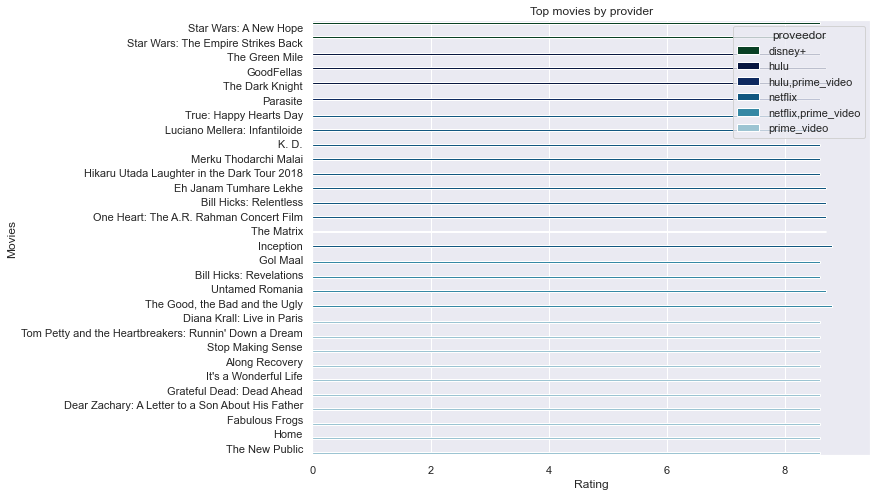

In [332]:
sns.set()
plt.figure(figsize=(10, 8))
plt.title('Top movies by provider')

# sns.barplot(data=top_10_provider_imdb, y='title', x='imdb', palette='ocean')
sns.barplot(x = "imdb", y = "title", hue = "proveedor", data = top_providers, palette='ocean')

plt.xlabel('Rating')
plt.ylabel('Movies')

# showing plot
plt.show()

## 4. Cuales son los directores mas populares, average, y los menos populares.

df.head()

#### Reducimos el número de columnas a analizar

In [373]:

# popular_directors_df = df[['id', 'title','year', 'imdb', 'rotten_tomatoes', 'directors','genres']]
popular_directors_df = df[['title', 'year', 'imdb', 'directors','genres']]
# popular_directors_df = df[['imdb', 'directors']]
# print(popular_movies)
popular_directors_df.head(30)


,title,year,imdb,directors,genres
0,Inception,2010,8.8,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller"
1,The Matrix,1999,8.7,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi"
2,Avengers: Infinity War,2018,8.5,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi"
3,Back to the Future,1985,8.5,Robert Zemeckis,"Adventure,Comedy,Sci-Fi"
4,"The Good, the Bad and the Ugly",1966,8.8,Sergio Leone,Western
5,Spider-Man: Into the Spider-Verse,2018,8.4,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi"
6,The Pianist,2002,8.5,Roman Polanski,"Biography,Drama,Music,War"
7,Django Unchained,2012,8.4,Quentin Tarantino,"Drama,Western"
8,Raiders of the Lost Ark,1981,8.4,Steven Spielberg,"Action,Adventure"
9,Inglourious Basterds,2009,8.3,Quentin Tarantino,"Adventure,Drama,War"


In [375]:
popular_directors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      16744 non-null  object 
 1   year       16744 non-null  int64  
 2   imdb       16173 non-null  float64
 3   directors  16018 non-null  object 
 4   genres     16469 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 654.2+ KB


### Identificamos los campos con valores nulos

In [376]:
popular_directors_df.columns[popular_directors_df.isnull().any()]

Index(['imdb', 'directors', 'genres'], dtype='object')

### Identificamos el tamaño del dataframe con datos originales

In [377]:
len(popular_directors_df)

16744

### Se eliminan datos valores nulos

In [411]:
popular_directors = popular_directors_df.dropna()

### Identificamos el tamaño del dataframe limpio de datos nulos

In [405]:
len(popular_directors)

15666

### Ordenamos por calificación 'imdb'

In [412]:
popular_directors.sort_values(by=['imdb'], ascending=False, inplace=True)
# print(popular_directors)
popular_directors.head(60)

,title,year,imdb,directors,genres
6566,Square One,2019,9.3,Danny Wu,"Documentary,Drama,Music"
6837,Steven Banks: Home Entertainment Center,1989,9.3,Tom McLoughlin,Comedy
5110,Love on a Leash,2011,9.3,Fen Tian,"Comedy,Drama,Fantasy,Romance"
7220,"Down, But Not Out!",2015,9.3,Miguel Gaudêncio,"Documentary,Sport"
7426,Bounty,2011,9.3,Roger Donaldson,"Adventure,Drama,History,Romance"
947,Natsamrat,2016,9.1,Mahesh Manjrekar,"Drama,Family"
7491,Finding Family,2013,9.1,"Chris Leslie,Oggi Tomic","Documentary,Family,History,War"
8458,Where's Daddy?,2017,9.1,Rel Dowdell,Documentary
7002,Escape from Firebase Kate,2015,9.0,Paul Kakert,Documentary
7267,A Dog Named Gucci,2015,9.0,Gorman Bechard,"Documentary,Biography,Drama,News"


### Identificamos el valor promedio de 'imdb'

In [407]:
media = popular_directors.imdb.mean()
print(f'El valor medio de imdb es: {round(media,2)}')

El valor medio de imdb es: 5.9


### Contabilizamos y ordenamos

In [410]:
# popular_directors.groubpy().size()
# popular_directors.groupby(['directors']).count() 

### Directores populares

In [413]:
popular_directors_top = popular_directors[popular_directors['imdb'] >= 8]
contados = popular_directors_top.value_counts('directors')
# print(contados)
contados.head(60)

directors
Rocco Urbisci                                         10
Hrishikesh Mukherjee                                   4
Quentin Tarantino                                      4
Steven J. Santos                                       3
Billy Wilder                                           3
Martin Scorsese                                        3
Christopher Nolan                                      3
Ashutosh Gowariker                                     2
David Batty                                            2
Joe Berlinger,Bruce Sinofsky                           2
Milton Lage                                            2
Arthur Ginsberg                                        2
Mani Ratnam                                            2
Manny Rodriguez                                        2
Roman Polanski                                         2
Louis C.K.                                             2
Jason Epperson                                         2
Bo Burnham,Christophe

### Directores promedio

In [432]:
print(media)
# popular_directors_avg = popular_directors[ (popular_directors['imdb'] >= (media+1)) & (popular_directors['imdb'] < (media-1)) ]
# popular_directors_avg = popular_directors[popular_directors['imdb'] == media ]
popular_directors_avg = popular_directors[(popular_directors['imdb'] <= (media + 0.3)) & (popular_directors['imdb'] >= (media - 0.3))]
# print(popular_directors_avg)
#contados2 = popular_directors_avg.value_counts('directors')
# print(contados)
popular_directors_avg.head(60)

5.899016979445934


,title,year,imdb,directors,genres
8119,Between Strangers,2002,6.1,Edoardo Ponti,Drama
12669,Ocean Driven,2017,6.1,"Christopher Bertish,Adrian Charles,Sean Dewil,...","Documentary,Action,Biography,Sport"
8230,Runaway Romance,2018,6.1,Brian Herzlinger,"Drama,Romance"
6588,Another Happy Day,2011,6.1,Sam Levinson,"Comedy,Drama"
456,Die Another Day,2002,6.1,Lee Tamahori,"Action,Adventure,Thriller"
11380,The Joe Louis Story,1953,6.1,Robert Gordon,"Biography,Drama,Film-Noir,Sport"
435,Uncorked,2020,6.1,Prentice Penny,Drama
8917,Winds of the Wasteland,1936,6.1,Mack V. Wright,"Comedy,Romance,Western"
11355,Identity Unknown,1945,6.1,Frank Marshall,Drama
12666,Buckskin Frontier,1943,6.1,Lesley Selander,"Action,Drama,Western"


### Directores menos populares

In [428]:
popular_directors_bottom = popular_directors[popular_directors['imdb'] < 1]
popular_directors_bottom.head(60)
#contados3 = popular_directors_bottom.value_counts('directors')
# contados3.head(60)

,title,year,imdb,directors,genres
13813,In Memoriam Alexander Litvinenko,2007,0.0,Jos de Putter,Documentary
13821,From Philadelphia To Fallujah,2011,0.0,David Hammelburg,"Documentary,Short"
